## Chapter 1. Exploratory Data Analysis 

### 1. Estimates of Location 

- mean
- weighted mean 
- median 
- percentile 
- weighted median 
- trimmed mean (drop outliers)


In [1]:
import pandas as pd 
import numpy as np 

df = pd.read_csv('movies.csv')

In [2]:
df.columns

Index(['rank', 'movie_id', 'title', 'year', 'link', 'imbd_votes',
       'imbd_rating', 'certificate', 'duration', 'genre', 'cast_id',
       'cast_name', 'director_id', 'director_name', 'writer_id', 'writer_name',
       'storyline', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rank            250 non-null    int64  
 1   movie_id        250 non-null    object 
 2   title           250 non-null    object 
 3   year            250 non-null    int64  
 4   link            250 non-null    object 
 5   imbd_votes      250 non-null    object 
 6   imbd_rating     250 non-null    float64
 7   certificate     249 non-null    object 
 8   duration        250 non-null    object 
 9   genre           250 non-null    object 
 10  cast_id         250 non-null    object 
 11  cast_name       250 non-null    object 
 12  director_id     250 non-null    object 
 13  director_name   250 non-null    object 
 14  writer_id       250 non-null    object 
 15  writer_name     250 non-null    object 
 16  storyline       250 non-null    object 
 17  user_id         250 non-null    obj

Let's find out on average, which year was the best for film. 

In [4]:
avg_yr = df['year'].mean()
avg_yr

1986.36

In [5]:
weighted_avg_yr = np.average(np.array(df['year']), weights = df['imbd_rating'])
weighted_avg_yr

1986.3817113689993

In [6]:
median_yr = df['year'].median()
median_yr

1994.0

In [7]:
%pip install wquantiles

Note: you may need to restart the kernel to use updated packages.


In [8]:
import wquantiles

weighted_median_yr = wquantiles.median(df['year'], weights = df['imbd_rating'])
weighted_median_yr

1994.0

In [9]:
from scipy import stats 

trim_average_yr = stats.trim_mean(df['year'], 0.1)
trim_average_yr

1988.57

### 2. Estimates of Variability 

- standard deviation 
- variance 
- mean absolute deviation 
- median absolute deviation 
- range 
- order/ranks 
- percentiles/quantiles
- interquantile range (IQR)


In [10]:
import statsmodels.api as sm

standard_dev = df['year'].std()
standard_dev

#variance is just std to the power of 2 

25.125356398199536

In [11]:
# IQR = 75% - 25% 

IQR = df['year'].quantile(0.75) - df['year'].quantile(0.25)
IQR

39.75

In [12]:
mean_abs_dev = sm.robust.scale.mad(df['year'])
mean_abs_dev

23.721635496089633

In [13]:
range_ = df['year'].max() - df['year'].min()
range_

101

### 3. Exploring Distributions 

- percentile table
- Boxplot 
- Frequency Table
- Histogram
- Density Plot

In [14]:
perc_table = pd.DataFrame(df['year'].quantile([.05, 0.25, 0.5,.75, 0.95]))
perc_table.transpose()

,0.05,0.25,0.50,0.75,0.95
year,1939.45,1966.25,1994.0,2006.0,2018.0


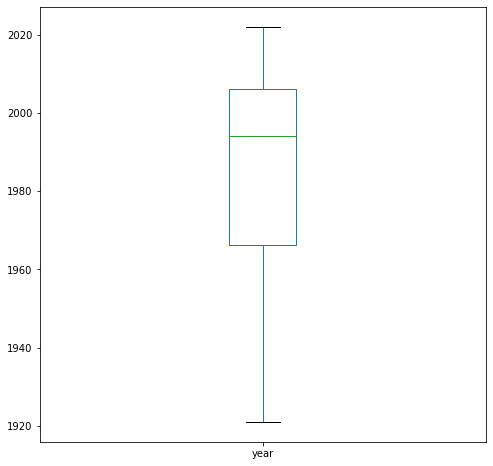

In [15]:
ax = (df['year']).plot.box(figsize = (8,8))
ax.set_label('Years')

In [16]:
frq_table = pd.cut(df['year'], 10) #100 years, 10 bins, 10 decades 
frq_table.value_counts()

(1991.7, 2001.8]      48
(2001.8, 2011.9]      48
(2011.9, 2022.0]      38
(1981.6, 1991.7]      25
(1951.3, 1961.4]      24
(1971.5, 1981.6]      24
(1961.4, 1971.5]      15
(1941.2, 1951.3]      11
(1931.1, 1941.2]       9
(1920.899, 1931.1]     8
Name: year, dtype: int64

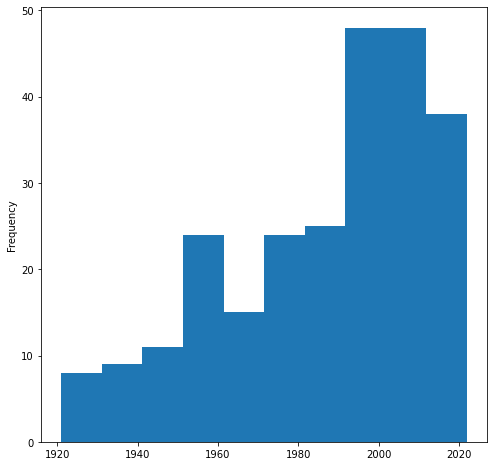

In [17]:
ax2 = (df['year']).plot.hist(figsize = (8,8))
ax2.set_label(' Historgram - year')

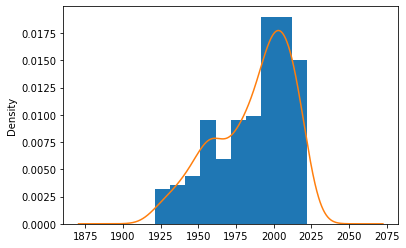

In [18]:
ax3 = df['year'].plot.hist(density = True)
df['year'].plot.density(ax = ax3)
ax3.set_label('Density Plot')

### 4. Exploring Binary and Categorical Data 

- Mode
- Bar Charts 
- Expected Value 
- Pie Charts 

In [19]:
df.columns

Index(['rank', 'movie_id', 'title', 'year', 'link', 'imbd_votes',
       'imbd_rating', 'certificate', 'duration', 'genre', 'cast_id',
       'cast_name', 'director_id', 'director_name', 'writer_id', 'writer_name',
       'storyline', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content'],
      dtype='object')

In [20]:
#let's check genre and add a binary variable, is the movie old or new? New is after 2000 

old_or_new = []
yr = np.array(df['year'])

for i in range(len(yr)):
    if yr[i] < 2000: 
        old_or_new.insert(i, 0)
    else:
        old_or_new.insert(i, 1)

    
old_or_new = pd.Series(old_or_new)        
df['oldOrNew'] = old_or_new

df.columns

Index(['rank', 'movie_id', 'title', 'year', 'link', 'imbd_votes',
       'imbd_rating', 'certificate', 'duration', 'genre', 'cast_id',
       'cast_name', 'director_id', 'director_name', 'writer_id', 'writer_name',
       'storyline', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'oldOrNew'],
      dtype='object')

In [21]:
genre = df['genre']
age_ = df['oldOrNew']

In [22]:
import statistics 

md_gnr = statistics.mode(genre)
md_age = statistics.mode(age_)

print('most frequent movie genre in the top 250: ', md_gnr)

if md_age == 0: 
    print('most frequent century is the 1900s')
else: 
    print('most frequent century is the 21st century.')

most frequent movie genre in the top 250:  Drama
most frequent century is the 1900s


In [27]:
keys_ = genre.unique()

In [33]:
genre_dict = dict(genre.value_counts())

In [35]:
import matplotlib.pyplot as plt

Text(0.5, 0.98, 'Categorical Plotting')

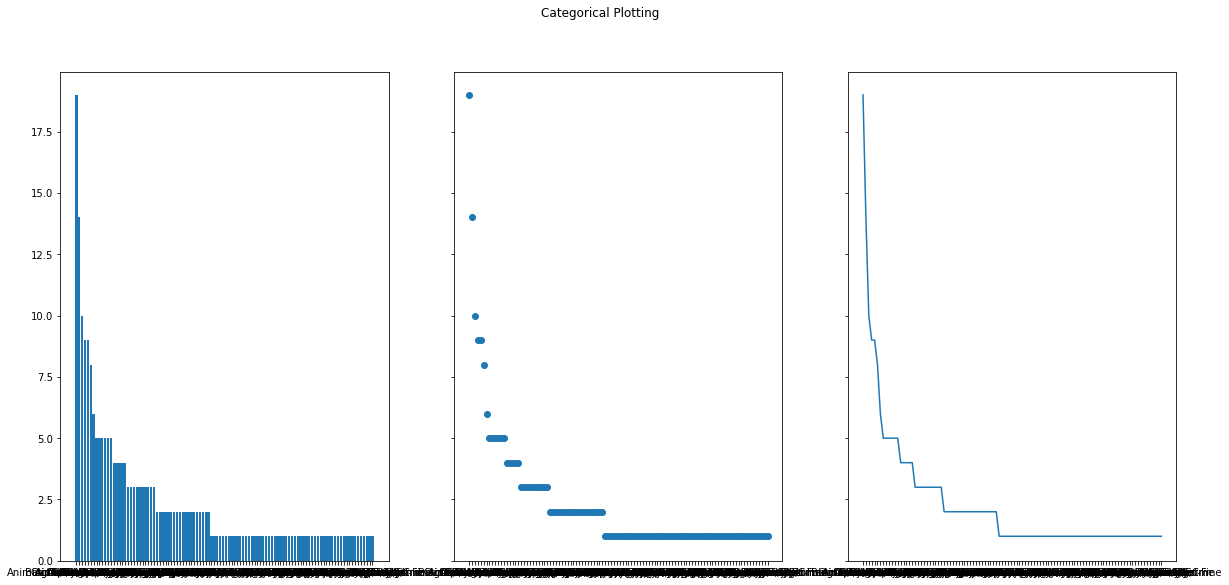

In [40]:
genre_name = list(genre_dict.keys())
genre_frequency = list(genre_dict.values())

fig, axs = plt.subplots(1, 3, figsize=(20, 9), sharey=True)
axs[0].bar(genre_name, genre_frequency)
axs[1].scatter(genre_name, genre_frequency)
axs[2].plot(genre_name, genre_frequency)
fig.suptitle('Categorical Plotting')




In [45]:
#I'll just do top 5 of each side 

temp = genre.value_counts()
temp = pd.DataFrame(temp)
temp

,genre
Drama,19
"Crime,Drama",14
"Animation,Adventure,Comedy",10
"Crime,Drama,Mystery",9
"Biography,Drama,History",9
...,...
"Action,Drama,Sport",1
"Drama,Horror",1
"Drama,Mystery,Sci-Fi",1
"Adventure,Comedy,Crime",1


In [46]:
top = temp.head()
bottom = temp.tail()

In [47]:
top

,genre
Drama,19
"Crime,Drama",14
"Animation,Adventure,Comedy",10
"Crime,Drama,Mystery",9
"Biography,Drama,History",9


In [48]:
bottom

,genre
"Action,Drama,Sport",1
"Drama,Horror",1
"Drama,Mystery,Sci-Fi",1
"Adventure,Comedy,Crime",1
"Action,Comedy,Crime",1


In [49]:
top_dict = pd.DataFrame.to_dict(top)
low_dict = pd.DataFrame.to_dict(bottom)

top_dict

{'genre': {'Drama': 19,
  'Crime,Drama': 14,
  'Animation,Adventure,Comedy': 10,
  'Crime,Drama,Mystery': 9,
  'Biography,Drama,History': 9}}

In [50]:
top_dict = top_dict['genre']
top_dict

{'Drama': 19,
 'Crime,Drama': 14,
 'Animation,Adventure,Comedy': 10,
 'Crime,Drama,Mystery': 9,
 'Biography,Drama,History': 9}

In [51]:
low_dict = low_dict['genre']

In [55]:
#put them all together 

top_dict.update(low_dict)
top_dict

{'Drama': 19,
 'Crime,Drama': 14,
 'Animation,Adventure,Comedy': 10,
 'Crime,Drama,Mystery': 9,
 'Biography,Drama,History': 9,
 'Action,Drama,Sport': 1,
 'Drama,Horror': 1,
 'Drama,Mystery,Sci-Fi': 1,
 'Adventure,Comedy,Crime': 1,
 'Action,Comedy,Crime': 1}

In [58]:
sizes_ = list(top_dict.values())
labels_ = list(top_dict.keys())

([<matplotlib.patches.Wedge at 0x7fd1a3159070>,
 [Text(0.6799749020149729, 0.8646583907126144, 'Drama'),
  Text(-0.8646583907126144, 0.6799749020149729, 'Crime,Drama'),
  Text(-0.9777189863700385, -0.5040491877699483, 'Animation,Adventure,Comedy'),
  Text(-0.20817632436129796, -1.0801215755531504, 'Crime,Drama,Mystery'),
  Text(0.6799749424925521, -0.8646583588806915, 'Biography,Drama,History'),
  Text(1.0005952318392295, -0.45695643339447445, 'Action,Drama,Sport'),
  Text(1.0395009306980727, -0.359774672646423, 'Drama,Horror'),
  Text(1.0689927475971255, -0.2593347365563446, 'Drama,Mystery,Sci-Fi'),
  Text(1.0888036000597223, -0.1565462247931533, 'Adventure,Comedy,Crime'),
  Text(1.0987540779274896, -0.05234000609201452, 'Action,Comedy,Crime')])

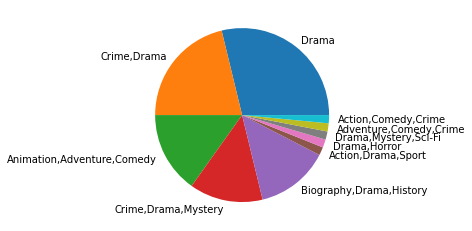

In [59]:
plt.pie(sizes_, labels=labels_)

### 5. Correlation 

- Correlation Coefficient 
- Correlation Matrix
- Scatterplot 

In [60]:
df.corr()

,rank,year,imbd_rating,oldOrNew
rank,1.000000,-0.055716,-0.854198,0.053334
year,-0.055716,1.000000,0.031470,0.737468
imbd_rating,-0.854198,0.031470,1.000000,-0.070273
oldOrNew,0.053334,0.737468,-0.070273,1.000000


<AxesSubplot:>

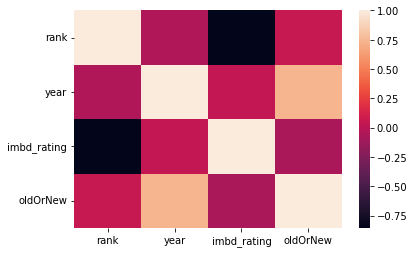

In [61]:
import seaborn as sns 

sns.heatmap(df.corr())

In [63]:
from sklearn.covariance import EmpiricalCovariance

y = np.array(df['year']).reshape(-1,1)
r = np.array(df['imbd_rating']).reshape(-1,1)

cov = EmpiricalCovariance().fit(r, y)


EmpiricalCovariance()

In [64]:
cov.covariance_

array([[0.05223376]])

In [65]:
cov.location_

array([8.3068])

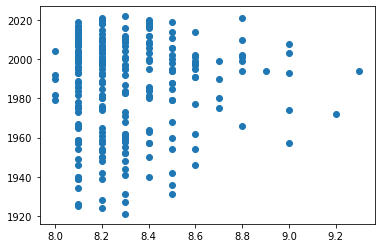

In [66]:
#scatter plot 

plt.scatter(r, y)